In [9]:
import pandas as pd
import numpy as np
import os
import sys 
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

from visualization import plot_categorical_distribution, plot_correlation_heatmap

In [6]:
# Carga de datos

In [10]:
try:
    df_pokemon = pd.read_csv('../data/raw/final_pokemon.csv')
except FileNotFoundError:
    print("Error: El archivo final_pokemon.csv no se encontró en '../data/raw/'. Verifica la ruta.")
    # Salir o manejar el error como prefieras
    # df_pokemon = pd.DataFrame() # Crear un DF vacío para evitar errores posteriores si se continúa

if not df_pokemon.empty:
    print("Primeras filas del dataset:")
    print(df_pokemon.head())
    print("\nInformación del dataset:")
    df_pokemon.info()


Primeras filas del dataset:
   #        Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  1   Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1  2     Ivysaur  Grass  Poison  60      62       63       80       80     60   
2  3    Venusaur  Grass  Poison  80      82       83      100      100     80   
3  5  Charmander   Fire  Normal  39      52       43       60       50     65   
4  6  Charmeleon   Fire  Normal  58      64       58       80       65     80   

   Generation  Legendary  height  weight  base_experience  \
0           1      False       7      69               64   
1           1      False      10     130              142   
2           1      False      20    1000              236   
3           1      False       6      85               62   
4           1      False      11     190              142   

                                             sprites  
0  {'normal': 'http://img.pokemondb.net/sprites/b...  
1  {'nor

In [8]:
# Usar funciones de graficos

/home/fedora/Universidad/Comp_cient/analisis-pokecientifico/src/visualization.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataframe, y=column_name, order=dataframe[column_name].value_counts().index, palette=palette)


Gráfico guardado en: ../images/distribucion_tipo1_funcion.png


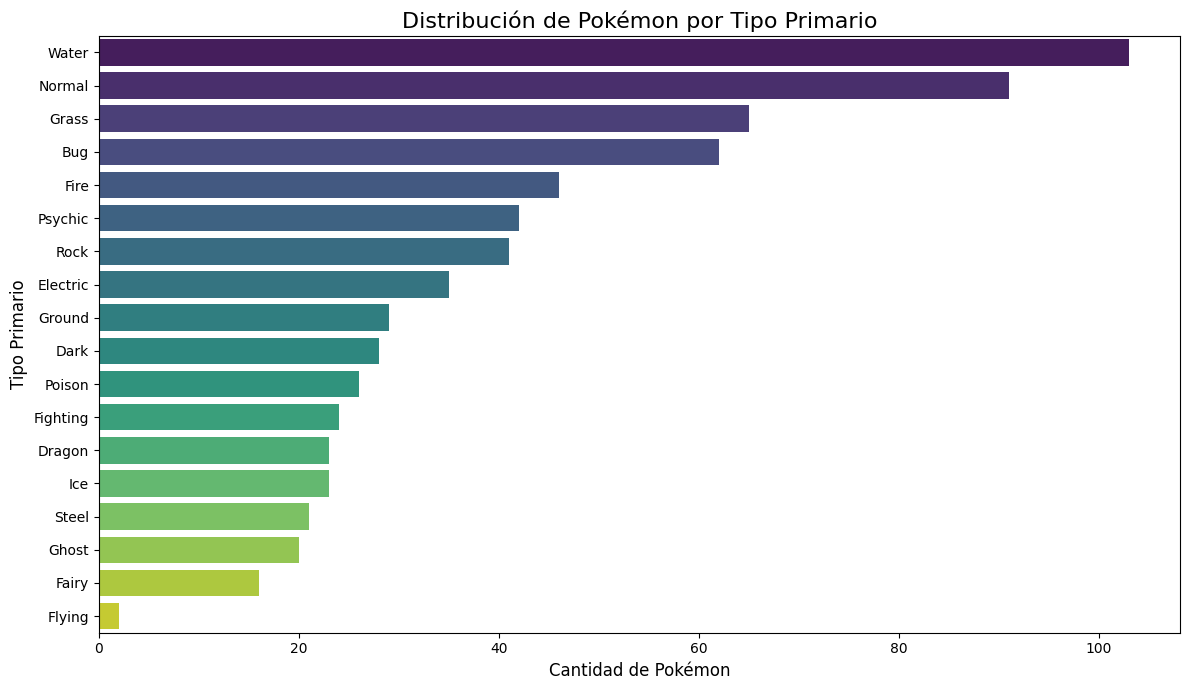

In [11]:
# Generar grafico distribucion categorica
if not df_pokemon.empty and 'Type 1' in df_pokemon.columns: # Asumiendo que la columna se llama 'Type 1'
    plot_categorical_distribution(
        dataframe=df_pokemon,
        column_name='Type 1',
        plot_title='Distribución de Pokémon por Tipo Primario',
        xlabel='Cantidad de Pokémon',
        ylabel='Tipo Primario',
        save_path='../images/distribucion_tipo1_funcion.png'
    )
else:
    print("DataFrame vacío o columna 'Type 1' no encontrada. Omitiendo gráfico de distribución de tipos.")


In [ ]:
# Grafico heatmap

Gráfico guardado en: ../images/matriz_correlacion_funcion.png


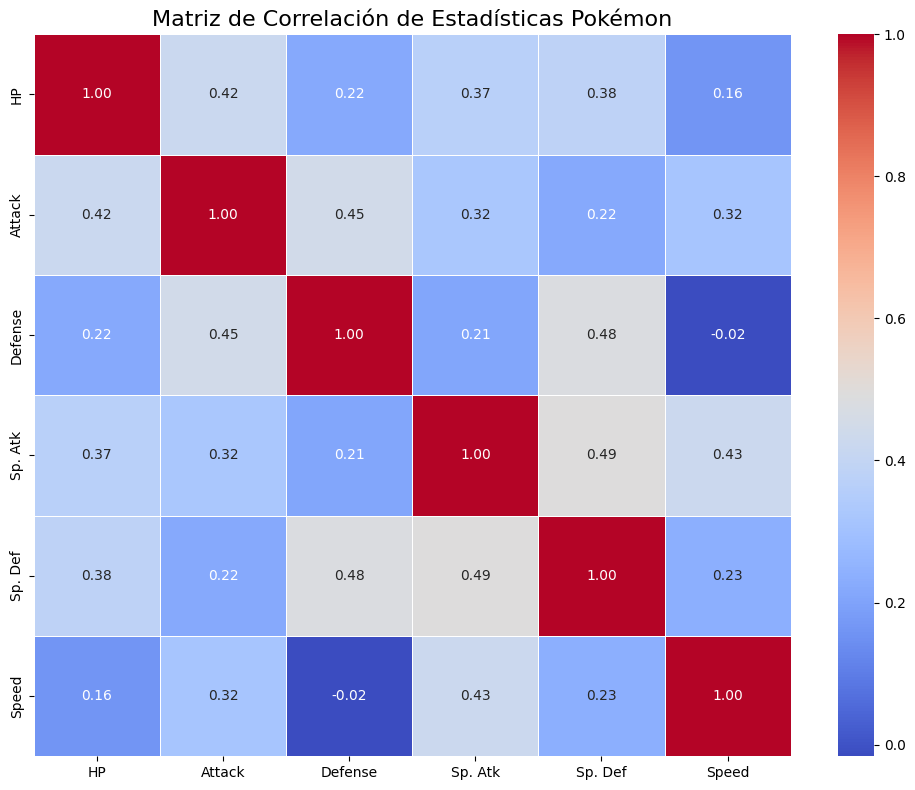

In [12]:
if not df_pokemon.empty:
    numerical_stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Height', 'Weight'] # Nombres de ejemplo
    
    # Filtrar columnas que existen en el DataFrame
    existing_numerical_cols = [col for col in numerical_stats_cols if col in df_pokemon.columns and pd.api.types.is_numeric_dtype(df_pokemon[col])]
    
    if existing_numerical_cols:
        plot_correlation_heatmap(
            dataframe=df_pokemon[existing_numerical_cols],
            title="Matriz de Correlación de Estadísticas Pokémon",
            save_path='../images/matriz_correlacion_funcion.png'
        )
    else:
        print("No se encontraron columnas numéricas adecuadas para la matriz de correlación.")
else:
    print("DataFrame vacío. Omitiendo heatmap de correlación.")
    